# 🌾 Wheat Leaf Disease Classification with CNNs 🚀

Welcome to this exciting notebook where we’ll dive into the world of **image classification** using deep learning! In this project, we'll harness the power of **Convolutional Neural Networks (CNNs)** to classify images of wheat leaves into different disease categories. 🏞️🌾

This notebook will walk you through the following steps:

### 1. **Downloading the Dataset** 📥
First, we'll grab a **rich, high-quality dataset** from **Roboflow**—a treasure trove of images labeled with different wheat leaf diseases. This dataset will serve as the foundation for our model.

### 2. **Organizing the Data** 🗂️
We’ll clean up the dataset and organize it into neat folders for **training**, **validation**, and **testing**. Plus, we’ll categorize the images by disease class (like **Wheat Brown-rust**, **Wheat Healthy**, and more). Ready to get organized? Let’s do this! 🎯

### 3. **Building the Model** 🧠💻
Here’s where the magic happens! We’ll construct a **Convolutional Neural Network (CNN)**—a deep learning model designed to “see” and learn from the images. CNNs are **super effective** for image classification tasks because they can recognize patterns and features across images. 🌟

### 4. **Training the Model** 🏋️‍♀️
It’s time to train our model! We’ll optimize it using techniques like **data augmentation** and **rescaling** to improve its accuracy and prevent overfitting. Think of it as “supercharging” the model with more diverse data to help it perform better. ⚡

### 5. **Evaluating the Model** 🏆
Finally, we’ll test the model’s performance on new, unseen images to measure how well it classifies the wheat leaf diseases. Spoiler alert: We’re aiming for **high accuracy** here! 💥

Let's jump in and get started with the **setup**—installing essential libraries and preparing the dataset. Trust me, this will be a fun ride! 🎢


##Installing Robotflow

In [ ]:
!pip install roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 52.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


#Download the Dataset from Roboflow

In [ ]:
from roboflow import Roboflow

# Initialize Roboflow with API Key
rf = Roboflow(api_key="UE0CzuoEJIhiKjP6IR2h")

# Load the project
project = rf.workspace("wheatleafmodel").project("wheat_leaf_model")

# Select version (change number if needed)
version = project.version(1)

# Download dataset (YOLO format)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to wheat_leaf_model-1 in yolov8:: 100%|██████████| 13714/13714 [00:02<00:00, 6773.73it/s]


#Check Downloaded Files

In [ ]:
import os

dataset_path = "/content/wheat_leaf_model-1"
train_dir = os.path.join(dataset_path, "train")
valid_dir = os.path.join(dataset_path, "valid")
test_dir = os.path.join(dataset_path, "test")

print("Train images:", len(os.listdir(os.path.join(train_dir, "images"))))
print("Validation images:", len(os.listdir(os.path.join(valid_dir, "images"))))
print("Test images:", len(os.listdir(os.path.join(test_dir, "images"))))


Train images: 6348
Validation images: 289
Test images: 214


#Organizing the Dataset into Folders by Class

In [ ]:
import os
import shutil

#Define class names using numbers (YOLO format)
class_names = {
    0: "Wheat Brown-rust",
    1: "Wheat Healthy",
    2: "Wheat Smut",
    3: "Wheat-Yellow-rust",
    4: "Wheat Stem Rust"
}

# This function deletes a folder and creates it again
def clean_directory(path):
    if os.path.exists(path):
        shutil.rmtree(path) # Delete folder and all files inside
    os.makedirs(path)  # Create an empty folder

#This function organizes images by class name
def organize_dataset(source_dir, dest_dir, class_names):
     """
    - source_dir: folder with YOLO-style 'images' and 'labels'
    - dest_dir: where to copy images grouped by class
    - class_names: map from class ID to class name
    """
    print(f"📂 Organisation des images de {source_dir}...")

    images_dir = os.path.join(source_dir, "images")# Folder with image files
    labels_dir = os.path.join(source_dir, "labels")# Folder with label fil

    # Check if both folders exist
    if not os.path.exists(images_dir) or not os.path.exists(labels_dir):
        print(f"⚠️ Erreur : {source_dir} ne contient pas 'images' ou 'labels'")
        return
    # Loop through each label file
    for label_file in os.listdir(labels_dir):
        label_path = os.path.join(labels_dir, label_file)

        with open(label_path, "r") as file:
            lines = file.readlines()

            if lines:
                first_label = int(lines[0].split()[0])  # Get class ID from first line
                class_name = class_names.get(first_label, "Unknown")  # Convert ID to name

                # Create folder for this class if not already created
                class_folder = os.path.join(dest_dir, class_name)
                if not os.path.exists(class_folder):
                    os.makedirs(class_folder)

                # Find the image file with the same name
                image_name = label_file.replace(".txt", ".jpg")  # YOLO a le même nom pour image et label
                image_path = os.path.join(images_dir, image_name)

                 # Copy the image to the correct class folder
                if os.path.exists(image_path):
                    shutil.copy(image_path, class_folder)

# Define dataset base folder and destination folders
base_path = "/content/wheat_leaf_model-1"

train_dest = "/content/train_classification"
valid_dest = "/content/valid_classification"
test_dest = "/content/test_classification"

# Clean and create empty destination folders
clean_directory(train_dest)
clean_directory(valid_dest)
clean_directory(test_dest)

#Organize images from train, valid, and test folders
organize_dataset(f"{base_path}/train", train_dest, class_names)
organize_dataset(f"{base_path}/valid", valid_dest, class_names)
organize_dataset(f"{base_path}/test", test_dest, class_names)

print("✅ Organisation terminée !")


📂 Organisation des images de /content/wheat_leaf_model-1/train...
📂 Organisation des images de /content/wheat_leaf_model-1/valid...
📂 Organisation des images de /content/wheat_leaf_model-1/test...
✅ Organisation terminée !


In [ ]:
for class_name in class_names.values():
    train_path = f"/content/train_classification/{class_name}"
    valid_path = f"/content/valid_classification/{class_name}"
    test_path = f"/content/test_classification/{class_name}"

    train_count = len(os.listdir(train_path)) if os.path.exists(train_path) else 0
    valid_count = len(os.listdir(valid_path)) if os.path.exists(valid_path) else 0
    test_count = len(os.listdir(test_path)) if os.path.exists(test_path) else 0

    print(f"📂 {class_name}: Train={train_count}, Valid={valid_count}, Test={test_count}")


📂 Wheat Brown-rust: Train=1480, Valid=72, Test=53
📂 Wheat Healthy: Train=1021, Valid=47, Test=34
📂 Wheat Smut: Train=1005, Valid=40, Test=31
📂 Wheat-Yellow-rust: Train=1253, Valid=55, Test=46
📂 Wheat Stem Rust: Train=1589, Valid=75, Test=50


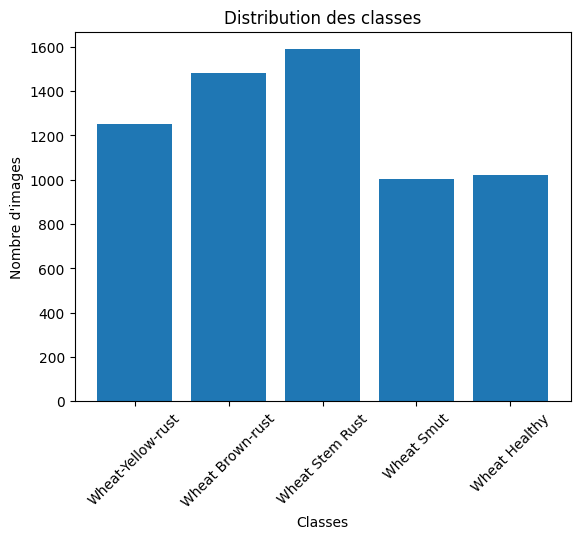

In [ ]:
import os
import matplotlib.pyplot as plt

# Function to check how many images are in each class folder
def check_class_distribution(image_folder):
    class_names = os.listdir(image_folder)  # Get all class folder names
    class_counts = {}  #  Dictionary to store class name and number of images

    for class_name in class_names:
        class_path = os.path.join(image_folder, class_name)  # Create path to class folder
        if os.path.isdir(class_path):  # Make sure it's a folder (not a file)
            class_counts[class_name] = len(os.listdir(class_path))  #  Count images inside


    # Draw a bar chart to show class distribution
    plt.bar(class_counts.keys(), class_counts.values())  # X = class names, Y = number of images
    plt.title("Class Distribution")  #  Title of the chart
    plt.xlabel("Classes")  # X-axis label
    plt.ylabel("Number of Images")  #  Y-axis label
    plt.xticks(rotation=45)  #  Rotate class names for better visibility
    plt.show()  #  Show the chart

# Run the function on the training classification folder
check_class_distribution("/content/train_classification")


#CNN

<h2>Image Preprocessing and Augmentation for Training, Validation, and Testing in TensorFlow</h2>


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Used to load and process image data

# Set the folders that contain the images
train_dir = "/content/train_classification"
valid_dir = "/content/valid_classification"
test_dir = "/content/test_classification"

# Create an ImageDataGenerator to preprocess and augment images
datagen = ImageDataGenerator(
    rescale=1./255,               # Normalize pixel values (0-255 → 0-1)
    rotation_range=20,            # Randomly rotate images by 20 degrees
    width_shift_range=0.2,        # Randomly shift images horizontally
    height_shift_range=0.2,       # Randomly shift images vertically
    horizontal_flip=True          #Flip images left to right
)

#Set batch size and target image size
batch_size = 64
img_size = (224, 224)
#Load and process images from each directory
train_data = datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')
valid_data = datagen.flow_from_directory(valid_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')
test_data = datagen.flow_from_directory(test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')


Found 6348 images belonging to 5 classes.
Found 289 images belonging to 5 classes.
Found 214 images belonging to 5 classes.


<h2>Building a Simple CNN Model for 5-Class Image Classification in TensorFlow</h2>


In [ ]:
# Try 0: Basic CNN model for image classification
from tensorflow.keras.models import Sequential  # Used to build models layer by layer
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # Import CNN layers


# Build a CNN model
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),  # 32 filters, 3x3 kernel, ReLU activation
    MaxPooling2D(2,2),  #Downsample with 2x2 pooling

    Conv2D(64, (3,3), activation='relu'),  # More filters to learn more features
    MaxPooling2D(2,2),  # Downsample again

    Flatten(),  # Flatten 2D feature maps into 1D vector
    Dense(128, activation='relu'),  #  Fully connected layer with 128 neurons
    Dropout(0.5),  #  Drop 50% of neurons during training to avoid overfitting
    Dense(5, activation='softmax')  # Final output layer with 5 classes (softmax = probability for each class)
])

# Compile the model (set how it will learn)
cnn_model.compile(
    optimizer='adam',  #Optimizer that adjusts weights
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  # Track accuracy during training
)
#Show a summary of the model
cnn_model.summary()


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,908,037 (91.20 MB)

 Trainable params: 23,908,037 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

<h2>Training the CNN Model for 30 Epochs with Training and Validation Data</h2>


In [ ]:
# Try 0: Train the CNN model on the data
history_cnn = cnn_model.fit(
    train_data,              # Training data
    validation_data=valid_data,  # Validation data to monitor model performance during training
    epochs=30                # Number of times to iterate through the entire training dataset
)


Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.


Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 104s 962ms/step - accuracy: 0.3880 - loss: 2.0500 - val_accuracy: 0.6851 - val_loss: 0.8381
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 91s 908ms/step - accuracy: 0.6205 - loss: 0.8835 - val_accuracy: 0.6713 - val_loss: 0.7690
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 88s 885ms/step - accuracy: 0.6982 - loss: 0.7425 - val_accuracy: 0.7163 - val_loss: 0.7047
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 89s 882ms/step - accuracy: 0.7200 - loss: 0.6847 - val_accuracy: 0.7336 - val_loss: 0.6720
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 88s 880ms/step - accuracy: 0.7330 - loss: 0.6594 - val_accuracy: 0.7578 - val_loss: 0.6213
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 88s 878ms/step - accuracy: 0.7562 - loss: 0.6184 - val_accuracy: 0.7751 - val_loss: 0.6187
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 89s 893ms/step - accuracy: 0.7733 - loss: 0.5733 - val_accuracy: 0.8028 - val_loss: 0.5239
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 88s 879ms/step - accuracy: 0.7883 - loss: 

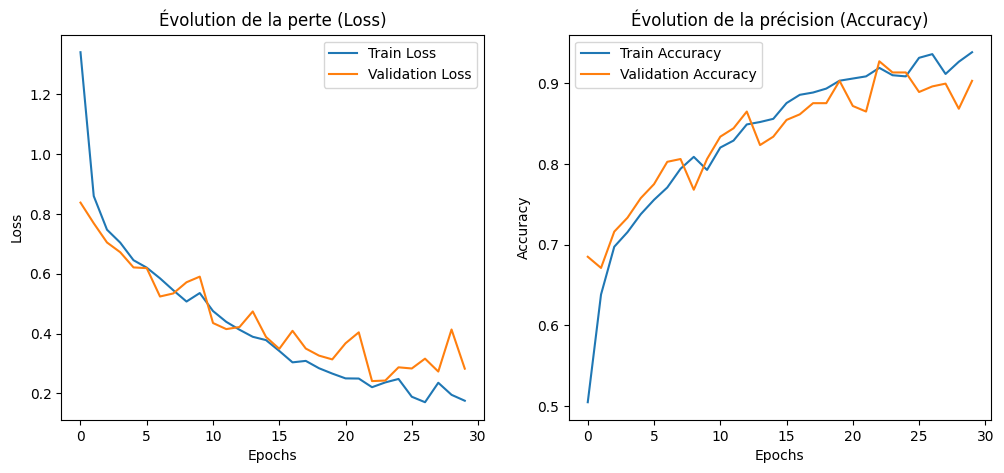

In [ ]:
#Try 0: Plot training and validation curves for loss and accuracy
import matplotlib.pyplot as plt  # Import the library for plotting

#Function to plot the training and validation curves
def plot_training_curves(history):
    plt.figure(figsize=(12, 5))  # Set the figure size for the plot

    # Plot the loss curve (train and validation loss over epochs)
    plt.subplot(1, 2, 1)  # Create the first subplot for loss
    plt.plot(history.history['loss'], label='Train Loss')  # Plot training loss
    plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot validation loss
    plt.xlabel('Epochs')  # Label for the x-axis (Epochs)
    plt.ylabel('Loss')  # Label for the y-axis (Loss)
    plt.title('Évolution de la perte (Loss)')  # Title for the loss plot
    plt.legend()  # Display the legend

    # Plot the accuracy curve (train and validation accuracy over epochs)
    plt.subplot(1, 2, 2)  # Create the second subplot for accuracy
    plt.plot(history.history['accuracy'], label='Train Accuracy')  # Plot training accuracy
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Plot validation accuracy
    plt.xlabel('Epochs')  # Label for the x-axis (Epochs)
    plt.ylabel('Accuracy')  # Label for the y-axis (Accuracy)
    plt.title('Évolution de la précision (Accuracy)')  # Title for the accuracy plot
    plt.legend()  # Display the legend

    plt.show()  # Display the plots

# **Display the training curves**
plot_training_curves(history_cnn)


In [ ]:
#Evaluate the CNN model on the test data
test_loss, test_acc = cnn_model.evaluate(test_data)
#Print the test accuracy
print(f"✅ CNN Test Accuracy: {test_acc:.2f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 934ms/step - accuracy: 0.9159 - loss: 0.3582
✅ CNN Test Accuracy: 0.93


#Essaie d autres façon CNN

In [ ]:
#Essaie 1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D,BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 5 classes
])
cnn_model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

cnn_model.summary()


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 109, 109, 128)       │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 109, 109, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,685 (217.52 KB)

 Trainable params: 55,365 (216.27 KB)

 Non-trainable params: 320 (1.25 KB)

In [ ]:
#Essaie 1
history_cnn = cnn_model.fit(train_data, validation_data=valid_data, epochs=30)


Epoch 1/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 103s 941ms/step - accuracy: 0.2237 - loss: 1.7047 - val_accuracy: 0.2422 - val_loss: 1.6133
Epoch 2/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 88s 880ms/step - accuracy: 0.3419 - loss: 1.5022 - val_accuracy: 0.2249 - val_loss: 1.6056
Epoch 3/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 87s 869ms/step - accuracy: 0.4079 - loss: 1.3871 - val_accuracy: 0.2630 - val_loss: 1.5570
Epoch 4/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 89s 886ms/step - accuracy: 0.4546 - loss: 1.3249 - val_accuracy: 0.3875 - val_loss: 1.4688
Epoch 5/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 87s 874ms/step - accuracy: 0.4968 - loss: 1.2540 - val_accuracy: 0.4844 - val_loss: 1.3532
Epoch 6/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 87s 870ms/step - accuracy: 0.4986 - loss: 1.2207 - val_accuracy: 0.5536 - val_loss: 1.2454
Epoch 7/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 87s 869ms/step - accuracy: 0.5059 - loss: 1.1932 - val_accuracy: 0.5675 - val_loss: 1.1815
Epoch 8/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 89s 886ms/step - accuracy: 0.5311 - loss: 

KeyboardInterrupt: 

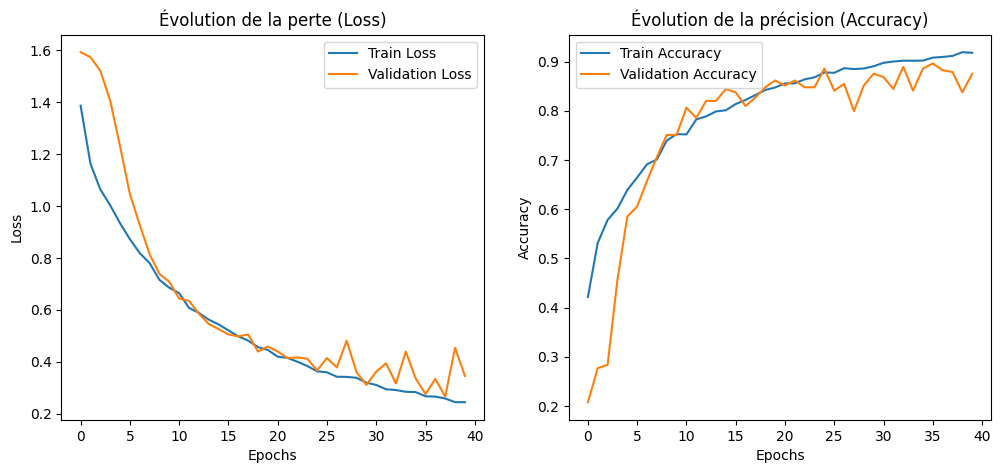

In [ ]:
#Essaie 1
import matplotlib.pyplot as plt
def plot_training_curves(history):
    plt.figure(figsize=(12, 5))

    # 🔹 Tracer l'évolution de la perte (loss)
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Évolution de la perte (Loss)')
    plt.legend()

    # 🔹 Tracer l'évolution de l'accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Évolution de la précision (Accuracy)')
    plt.legend()

    plt.show()

# 📊 **Afficher les courbes**
plot_training_curves(history_cnn)

In [ ]:
#essaie 2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Définition des répertoires
train_dir = "/content/train_classification"
valid_dir = "/content/valid_classification"
test_dir = "/content/test_classification"

# Prétraitement et augmentation des images
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,  # Augmenté de 20 à 40
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,  # Nouveau
    zoom_range=0.2,   # Nouveau
    horizontal_flip=True,
    fill_mode='nearest'  # Remplir les pixels vides
)

# Charger les images
batch_size = 64
img_size = (224, 224)  # Taille adaptée aux modèles pré-entraînés

train_data = datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')
valid_data = datagen.flow_from_directory(valid_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')
test_data = datagen.flow_from_directory(test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')


cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

cnn_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


Found 6348 images belonging to 5 classes.
Found 289 images belonging to 5 classes.
Found 214 images belonging to 5 classes.


In [ ]:
#Essaie 2
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

history = cnn_model.fit(
    train_data,
    validation_data=valid_data,
    epochs=30,
    callbacks=[early_stopping]
)

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.


Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 109s 996ms/step - accuracy: 0.3285 - loss: 1.5557 - val_accuracy: 0.5156 - val_loss: 1.1549
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 95s 952ms/step - accuracy: 0.5386 - loss: 1.1245 - val_accuracy: 0.5917 - val_loss: 1.0159
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 94s 930ms/step - accuracy: 0.5781 - loss: 0.9893 - val_accuracy: 0.6090 - val_loss: 0.9507
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 95s 953ms/step - accuracy: 0.6109 - loss: 0.9354 - val_accuracy: 0.6194 - val_loss: 0.8904
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 91s 915ms/step - accuracy: 0.6291 - loss: 0.8796 - val_accuracy: 0.6367 - val_loss: 0.8555
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 92s 916ms/step - accuracy: 0.6430 - loss: 0.8543 - val_accuracy: 0.6228 - val_loss: 0.8508
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 91s 906ms/step - accuracy: 0.6619 - loss: 0.8329 - val_accuracy: 0.6886 - val_loss: 0.8239
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 93s 932ms/step - accuracy: 0.6693 - loss: 

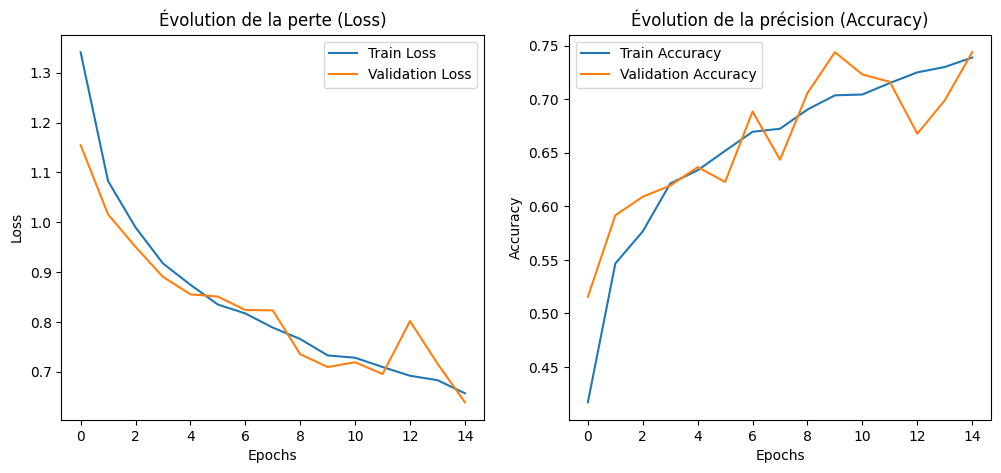

In [ ]:
#Essaie 0
import matplotlib.pyplot as plt
def plot_training_curves(history):
    plt.figure(figsize=(12, 5))

    # 🔹 Tracer l'évolution de la perte (loss)
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Évolution de la perte (Loss)')
    plt.legend()

    # 🔹 Tracer l'évolution de l'accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Évolution de la précision (Accuracy)')
    plt.legend()

    plt.show()

# 📊 **Afficher les courbes**
plot_training_curves(history)

#ResNet50

Sans Finetuning

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False  # On garde les poids pré-entraînés

model_resnet = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_resnet.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,850,629 (90.98 MB)

 Trainable params: 262,917 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
history_resnet = model_resnet.fit(train_data, validation_data=valid_data, epochs=30)


Epoch 1/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 118s 528ms/step - accuracy: 0.2410 - loss: 1.6415 - val_accuracy: 0.3356 - val_loss: 1.4808
Epoch 2/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 93s 469ms/step - accuracy: 0.3287 - loss: 1.4879 - val_accuracy: 0.3287 - val_loss: 1.4459
Epoch 3/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 92s 463ms/step - accuracy: 0.3544 - loss: 1.4538 - val_accuracy: 0.3287 - val_loss: 1.4172
Epoch 4/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 92s 464ms/step - accuracy: 0.3606 - loss: 1.4205 - val_accuracy: 0.3253 - val_loss: 1.4013
Epoch 5/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 140s 455ms/step - accuracy: 0.3664 - loss: 1.4034 - val_accuracy: 0.3356 - val_loss: 1.3845
Epoch 6/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 95s 476ms/step - accuracy: 0.3796 - loss: 1.3852 - val_accuracy: 0.3772 - val_loss: 1.3727
Epoch 7/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 93s 468ms/step - accuracy: 0.3760 - loss: 1.3826 - val_accuracy: 0.3460 - val_loss: 1.3647
Epoch 8/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 90s 451ms/step - accuracy: 0.3684 - loss:

##Avec Finetuning

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ReduceLROnPlateau

# 📌 Chemins des datasets
train_dir = "/content/train_classification"
valid_dir = "/content/valid_classification"
test_dir = "/content/test_classification"

# 📌 Prétraitement des images
img_size = 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode="nearest"
)

valid_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_data = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

# 📌 Charger ResNet50 sans la dernière couche (include_top=False)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# 📌 Geler toutes les couches du modèle de base pour Feature Extraction
base_model.trainable = False

# 📌 Ajouter des couches personnalisées
model_resnet = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 5 classes
])

# 📌 Compiler le modèle (Feature Extraction Phase)
model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 📌 Entraînement initial (Feature Extraction)
history_resnet = model_resnet.fit(train_data, validation_data=valid_data, epochs=10)

# 📌 🔥 Fine-tuning: Débloquer certaines couches de ResNet
base_model.trainable = True

# 📌 Ne réentraîner que les dernières couches (ex: 10 dernières)
for layer in base_model.layers[:-10]:
    layer.trainable = False

# 📌 Recompiler avec un learning rate plus bas
model_resnet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 📌 Entraînement avec Fine-tuning


lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=1e-7, verbose=1)
history_finetune = model_resnet.fit(train_data, validation_data=valid_data, epochs=30, callbacks=[lr_scheduler])

#history_finetune = model_resnet.fit(train_data, validation_data=valid_data, epochs=30)

# 📌 Tracer la courbe d'évolution de la loss et de l'accuracy
def plot_history(history, history_finetune):
    acc = history.history['accuracy'] + history_finetune.history['accuracy']
    val_acc = history.history['val_accuracy'] + history_finetune.history['val_accuracy']
    loss = history.history['loss'] + history_finetune.history['loss']
    val_loss = history.history['val_loss'] + history_finetune.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Train Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Accuracy Over Epochs')

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Train Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Loss Over Epochs')

    plt.show()

# 📌 Affichage des courbes
plot_history(history_resnet, history_finetune)


Found 6348 images belonging to 5 classes.
Found 289 images belonging to 5 classes.
Epoch 1/10
199/199 ━━━━━━━━━━━━━━━━━━━━ 108s 485ms/step - accuracy: 0.3515 - loss: 1.5499 - val_accuracy: 0.4291 - val_loss: 1.4152
Epoch 2/10
199/199 ━━━━━━━━━━━━━━━━━━━━ 93s 466ms/step - accuracy: 0.4667 - loss: 1.2476 - val_accuracy: 0.3806 - val_loss: 1.5223
Epoch 3/10
199/199 ━━━━━━━━━━━━━━━━━━━━ 88s 444ms/step - accuracy: 0.4870 - loss: 1.1944 - val_accuracy: 0.3356 - val_loss: 2.2512
Epoch 4/10
199/199 ━━━━━━━━━━━━━━━━━━━━ 86s 434ms/step - accuracy: 0.4981 - loss: 1.1941 - val_accuracy: 0.2249 - val_loss: 4.5584
Epoch 5/10
199/199 ━━━━━━━━━━━━━━━━━━━━ 87s 435ms/step - accuracy: 0.5292 - loss: 1.1203 - val_accuracy: 0.3426 - val_loss: 1.8060
Epoch 6/10
199/199 ━━━━━━━━━━━━━━━━━━━━ 87s 435ms/step - accuracy: 0.5233 - loss: 1.1339 - val_accuracy: 0.3114 - val_loss: 2.1082
Epoch 7/10
199/199 ━━━━━━━━━━━━━━━━━━━━ 88s 440ms/step - accuracy: 0.5197 - loss: 1.1269 - val_accuracy: 0.4775 - val_loss: 1.4922

#Inception V3

Sans Finetuning

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# 📌 Chemins des datasets
train_dir = "/content/train_classification"
valid_dir = "/content/valid_classification"
test_dir = "/content/test_classification"

# 📌 Prétraitement des images
img_size = 299  # InceptionV3 attend des images de taille 299x299
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(299, 299),  # ✅ Assurez-vous que les images sont redimensionnées correctement
    batch_size=batch_size,
    class_mode='categorical'
)

valid_datagen = ImageDataGenerator(rescale=1./255)
valid_data = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(299, 299),  # ✅ Même chose pour les données de validation
    batch_size=batch_size,
    class_mode='categorical'
)


Found 6348 images belonging to 5 classes.
Found 289 images belonging to 5 classes.


In [ ]:
from tensorflow.keras.applications import InceptionV3

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299,299,3))
base_model.trainable = False

model_inception = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

model_inception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_inception = model_inception.fit(train_data, validation_data=valid_data, epochs=15)


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.


Epoch 1/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 80s 293ms/step - accuracy: 0.6065 - loss: 1.0151 - val_accuracy: 0.8581 - val_loss: 0.4058
Epoch 2/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 37s 185ms/step - accuracy: 0.8811 - loss: 0.3478 - val_accuracy: 0.8858 - val_loss: 0.3033
Epoch 3/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 37s 185ms/step - accuracy: 0.9207 - loss: 0.2291 - val_accuracy: 0.8131 - val_loss: 0.4961
Epoch 4/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 38s 191ms/step - accuracy: 0.9489 - loss: 0.1602 - val_accuracy: 0.8789 - val_loss: 0.3082
Epoch 5/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 37s 184ms/step - accuracy: 0.9574 - loss: 0.1260 - val_accuracy: 0.9239 - val_loss: 0.2176
Epoch 6/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 37s 185ms/step - accuracy: 0.9770 - loss: 0.0852 - val_accuracy: 0.9204 - val_loss: 0.2265
Epoch 7/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 38s 190ms/step - accuracy: 0.9739 - loss: 0.0775 - val_accuracy: 0.8720 - val_loss: 0.3648
Epoch 8/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 39s 196ms/step - accuracy: 0.9817 - loss: 0

##Avec Finetuning

Found 6348 images belonging to 5 classes.
Found 289 images belonging to 5 classes.
Epoch 1/10
199/199 ━━━━━━━━━━━━━━━━━━━━ 180s 837ms/step - accuracy: 0.6490 - loss: 0.9181 - val_accuracy: 0.8651 - val_loss: 0.4022
Epoch 2/10
199/199 ━━━━━━━━━━━━━━━━━━━━ 147s 737ms/step - accuracy: 0.8553 - loss: 0.4104 - val_accuracy: 0.8754 - val_loss: 0.3609
Epoch 3/10
199/199 ━━━━━━━━━━━━━━━━━━━━ 146s 735ms/step - accuracy: 0.8701 - loss: 0.3340 - val_accuracy: 0.8651 - val_loss: 0.3463
Epoch 4/10
199/199 ━━━━━━━━━━━━━━━━━━━━ 147s 741ms/step - accuracy: 0.8783 - loss: 0.3150 - val_accuracy: 0.9066 - val_loss: 0.2646
Epoch 5/10
199/199 ━━━━━━━━━━━━━━━━━━━━ 147s 738ms/step - accuracy: 0.9126 - loss: 0.2459 - val_accuracy: 0.8339 - val_loss: 0.4426
Epoch 6/10
199/199 ━━━━━━━━━━━━━━━━━━━━ 147s 737ms/step - accuracy: 0.9104 - loss: 0.2482 - val_accuracy: 0.8408 - val_loss: 0.3671
Epoch 7/10
199/199 ━━━━━━━━━━━━━━━━━━━━ 144s 723ms/step - accuracy: 0.9015 - loss: 0.2549 - val_accuracy: 0.8651 - val_loss: 

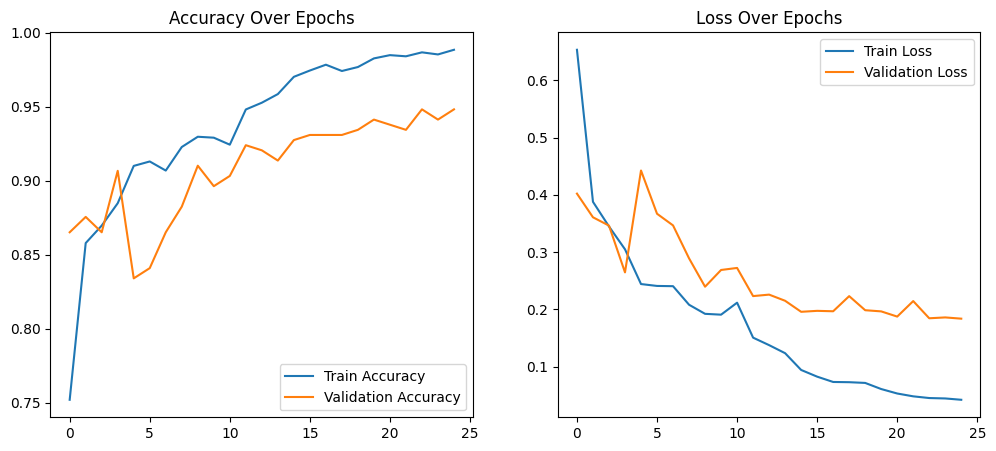

In [ ]:


  train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode="nearest"
  )

  valid_datagen = ImageDataGenerator(rescale=1./255)

  train_data = train_datagen.flow_from_directory(
      train_dir,
      target_size=(img_size, img_size),
      batch_size=batch_size,
      class_mode='categorical'
  )

  valid_data = valid_datagen.flow_from_directory(
      valid_dir,
      target_size=(img_size, img_size),
      batch_size=batch_size,
      class_mode='categorical'
  )

  # 📌 Charger InceptionV3 sans la dernière couche (include_top=False)
  base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

  # 📌 Geler toutes les couches du modèle de base pour Feature Extraction
  base_model.trainable = False

  # 📌 Ajouter des couches personnalisées
  model_inception_F = Sequential([
      base_model,
      GlobalAveragePooling2D(),
      Dense(256, activation='relu'),
      Dropout(0.5),
      Dense(5, activation='softmax')  # 5 classes
  ])

  # 📌 Compiler le modèle (Feature Extraction Phase)
  model_inception_F.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  # 📌 Entraînement initial (Feature Extraction)
  history_inception_F = model_inception_F.fit(train_data, validation_data=valid_data, epochs=10)

  # 📌 🔥 Fine-tuning: Débloquer certaines couches d'InceptionV3
  base_model.trainable = True

  # 📌 Ne réentraîner que les 30 dernières couches
  for layer in base_model.layers[:-30]:
      layer.trainable = False

  # 📌 Recompiler avec un learning rate plus bas
  model_inception_F.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  # 📌 Entraînement avec Fine-tuning
  history_finetune = model_inception_F.fit(train_data, validation_data=valid_data, epochs=15)

  # 📌 Tracer la courbe d'évolution de la loss et de l'accuracy
  def plot_history(history, history_finetune):
      acc = history.history['accuracy'] + history_finetune.history['accuracy']
      val_acc = history.history['val_accuracy'] + history_finetune.history['val_accuracy']
      loss = history.history['loss'] + history_finetune.history['loss']
      val_loss = history.history['val_loss'] + history_finetune.history['val_loss']

      epochs_range = range(len(acc))

      plt.figure(figsize=(12, 5))

      # Accuracy
      plt.subplot(1, 2, 1)
      plt.plot(epochs_range, acc, label='Train Accuracy')
      plt.plot(epochs_range, val_acc, label='Validation Accuracy')
      plt.legend(loc='lower right')
      plt.title('Accuracy Over Epochs')

      # Loss
      plt.subplot(1, 2, 2)
      plt.plot(epochs_range, loss, label='Train Loss')
      plt.plot(epochs_range, val_loss, label='Validation Loss')
      plt.legend(loc='upper right')
      plt.title('Loss Over Epochs')

      plt.show()

  # 📌 Affichage des courbes
  plot_history(history_inception_F, history_finetune)


##Comparer les Performances

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    plt.figure(figsize=(12,5))

    # Accuracy
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy - {model_name}')
    plt.legend()

    # Loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Loss - {model_name}')
    plt.legend()

    plt.show()

plot_history(history_cnn, "CNN")
plot_history(history_resnet, "ResNet50") #with finetuning
plot_history(history_inception, "InceptionV3")
plot_history(history_inception_F, "InceptionV3")


#Test

In [ ]:
#essaie 2
test_loss, test_acc = cnn_model.evaluate(test_data)
print(f"✅ CNN Test Accuracy: {test_acc:.2f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.6915 - loss: 0.8082
✅ CNN Test Accuracy: 0.70


In [ ]:
test_loss, test_acc = model_resnet.evaluate(test_data)
print(f"✅ ResNet Test Accuracy: {test_acc:.2f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.6457 - loss: 0.9607
✅ ResNet Test Accuracy: 0.64


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(299, 299),  # ✅ Assurez-vous du bon redimensionnement
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Ne pas mélanger les données de test
)

# Évaluer le modèle
test_loss, test_acc = model_inception_F.evaluate(test_data)
print(f"✅ inception with finetuning Test Accuracy: {test_acc:.2f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 792ms/step - accuracy: 0.9106 - loss: 0.3583
✅ inception with finetuning Test Accuracy: 0.93


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(299, 299),  # ✅ Assurez-vous du bon redimensionnement
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Ne pas mélanger les données de test
)

# Évaluer le modèle
test_loss, test_acc = model_inception.evaluate(test_data)
print(f"✅ Inception without fine-tuning Test Accuracy: {test_acc:.2f}")


Found 214 images belonging to 5 classes.
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8582 - loss: 0.6588
✅ Inception without fine-tuning Test Accuracy: 0.90


##Sauvegarde des modeles

In [ ]:
# Sauvegarder le modèle CNN
cnn_model.save('/content/cnn_model.h5')

# Sauvegarder le modèle ResNet
#model_resnet.save('/content/model_resnet.h5')

# Sauvegarder le modèle Inception
#model_inception_F.save('/content/model_inception_F_93%.h5')
